In [1]:
import pymc
import numpy as np
import pandas as pd
import seaborn as sns

In [32]:
disasters_array = np.array([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                            3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                            2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0,
                            1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                            0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                            3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                            0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

switchpoint = pymc.DiscreteUniform('switchpoint', lower=0, upper=110, doc='Switchpoint[year]')
early_mean = pymc.Exponential('early_mean', beta=1.)
late_mean = pymc.Exponential('late_mean', beta=1.)

In [19]:
@pymc.deterministic(plot=False)
def rate(s=switchpoint, e=early_mean, l=late_mean):
    ''' Concatenate Poisson Means '''
    out = np.empty(len(disasters_array))
    out[:s] = e
    out[s:] = l
    return out

In [20]:
disasters = pymc.Poisson('disasters', mu=rate, value=disasters_array, observed=True)

In [21]:
switchpoint.parents

{'lower': 0, 'upper': 110}

In [22]:
disasters.parents

{'mu': <pymc.PyMCObjects.Deterministic 'rate' at 0x7fbd66579c88>}

In [23]:
rate.children

{<pymc.distributions.new_dist_class.<locals>.new_class 'disasters' at 0x7fbd6659d198>}

In [24]:
disasters.value

array([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6, 3, 3, 5, 4, 5, 3, 1,
       4, 4, 1, 5, 5, 3, 4, 2, 5, 2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3,
       0, 0, 1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2,
       0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [25]:
switchpoint.value

array(63)

In [26]:
early_mean.value

array(0.10579268109853043)

In [27]:
late_mean.value

array(1.1865847805942225)

In [28]:
rate.value

array([ 0.10579268,  0.10579268,  0.10579268,  0.10579268,  0.10579268,
        0.10579268,  0.10579268,  0.10579268,  0.10579268,  0.10579268,
        0.10579268,  0.10579268,  0.10579268,  0.10579268,  0.10579268,
        0.10579268,  0.10579268,  0.10579268,  0.10579268,  0.10579268,
        0.10579268,  0.10579268,  0.10579268,  0.10579268,  0.10579268,
        0.10579268,  0.10579268,  0.10579268,  0.10579268,  0.10579268,
        0.10579268,  0.10579268,  0.10579268,  0.10579268,  0.10579268,
        0.10579268,  0.10579268,  0.10579268,  0.10579268,  0.10579268,
        0.10579268,  0.10579268,  0.10579268,  0.10579268,  0.10579268,
        0.10579268,  0.10579268,  0.10579268,  0.10579268,  0.10579268,
        0.10579268,  0.10579268,  0.10579268,  0.10579268,  0.10579268,
        0.10579268,  0.10579268,  0.10579268,  0.10579268,  0.10579268,
        0.10579268,  0.10579268,  0.10579268,  1.18658478,  1.18658478,
        1.18658478,  1.18658478,  1.18658478,  1.18658478,  1.18

In [33]:
mymodel = [
    disasters_array,
    switchpoint,
    early_mean,
    late_mean,
    rate,
    disasters]


M = pymc.MCMC(mymodel)

In [34]:
M.sample(iter=10000, burn=1000, thin=10)

 [-----------------100%-----------------] 10000 of 10000 complete in 0.6 sec

In [35]:
M.trace('switchpoint')[:]

array([ 40,  87,  95,  65,  48,  64,  90, 109,   6, 103,  74,  31,  37,
        25,  81,  24,  31,  90,  83,  23,   0,  90,   4,  12,  27,  96,
        99,   4,  76,  27,  81, 104,  15,  51,  79,  65,  86,  58,  10,
       102,  83,  35,  89,  65,  98,  37,  97,  39,  59,  32,   7,  23,
        36,  85, 100, 109,   3,  71,  47,  80,  72,  79,  38, 107,  94,
        14,  52,  86,   6,  90,  71,   7, 103, 100,  93,  71, 105,  72,
       101,   2, 101,  32,  41,  30,  63,  63,  19, 104,   3, 106,  21,
        26, 105,   2,  53,  46,  87,  84,  59,  89,   1,  95,  20,  95,
        14, 107,  49,  73,  34,  22,  98,  96,  58,  47,  68,  41,  56,
        50, 108,  56,  13,  66,  16,  20,  74,  26, 102,  46,  60,  40,
        29,  23, 108,  68, 108,  50,  51,  64,  29,  38,  46, 103,  47,
        91,  46, 107,  71,  93,  37, 104,  42,  48,  20,  10,  55,  44,
        27,   3,  92,   6,  75,  41,  49,   4,  76,  35,  86,  61, 103,
       108, 106,  21,  83,  56, 108,  74, 108,  76,  95,  31,  6

/projects/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


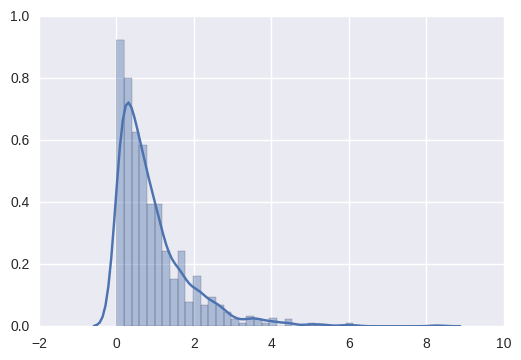

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

sns.distplot(M.trace('late_mean')[:])

Plotting switchpoint
Plotting early_mean
Plotting late_mean


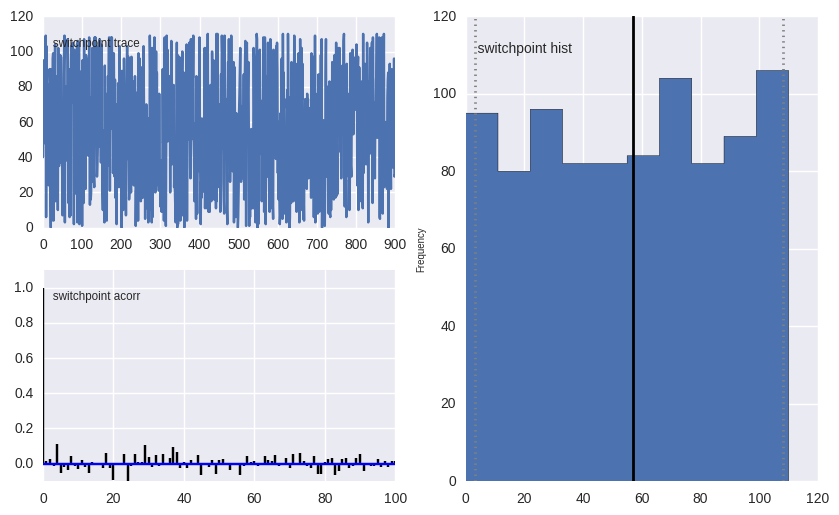

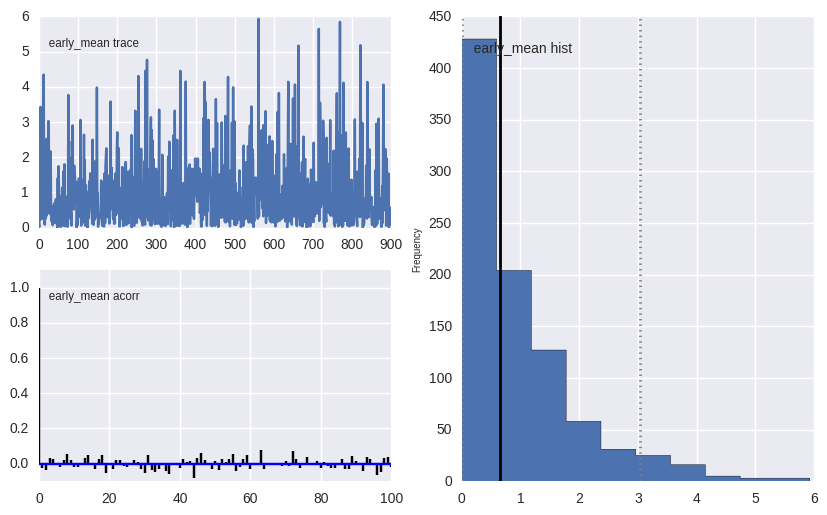

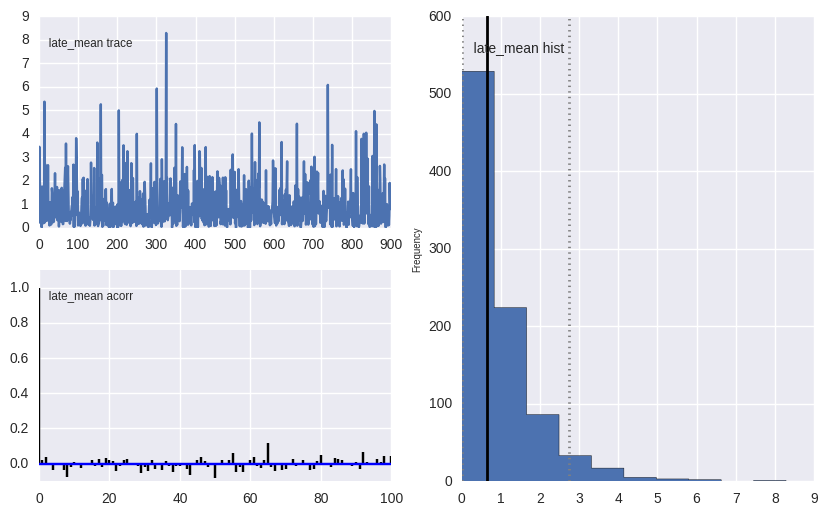

In [39]:
pymc.Matplot.plot(M)